In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict


# Data Cleaning + Identifying Trends

In [4]:
df = pd.read_csv("JobData.csv")
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


/var/folders/26/7l8wl7vd46b9rlntc4gz7qtc0000gn/T/ipykernel_64744/4250510516.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraudulent', palette='coolwarm') # showing imbalance between two classes


<Axes: xlabel='fraudulent', ylabel='count'>

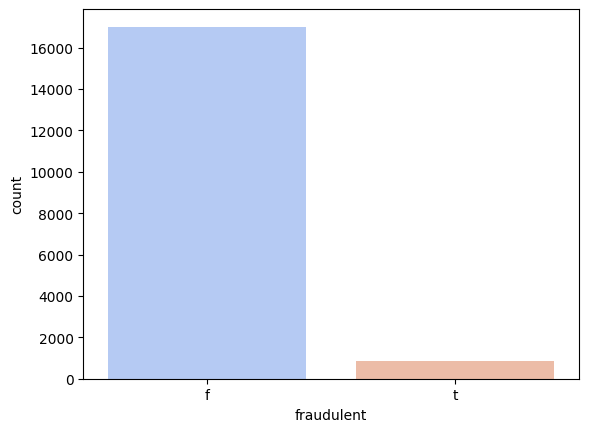

In [5]:
sns.countplot(data=df, x='fraudulent', palette='coolwarm') # showing imbalance between two classes

/var/folders/26/7l8wl7vd46b9rlntc4gz7qtc0000gn/T/ipykernel_64744/785830270.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


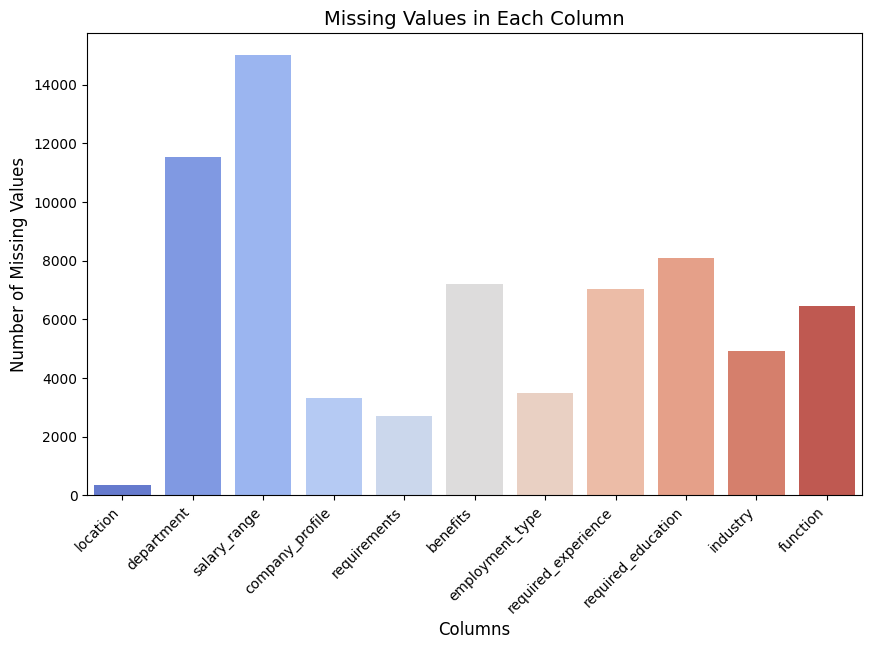

In [6]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0] # filtering out unneeded columns

missing_data_df = missing_data.reset_index()
missing_data_df.columns = ['Column', 'Missing Values']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=missing_data_df,
    x='Column',
    y='Missing Values',
    palette='coolwarm'
)

plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.title('Missing Values in Each Column', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

In [7]:
df.describe()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
count,17880,17534,6333,2868,14572,17880,15191,10684,17880,17880,17880,14409,10830,9775,12977,11425,17880,17880
unique,11231,3105,1337,874,1710,15095,12119,6510,2,2,2,5,7,13,131,37,2,2
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,<p>We help teachers get safe &amp; secure jobs...,"<p>Play with kids, get paid for it </p>\r\n<p>...",<p>University degree required. TEFL / TESOL / ...,<p>See job description</p>,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f
freq,311,718,551,142,726,376,410,726,17113,14220,9088,11620,3809,5145,1734,1749,17014,16980


In [8]:
df.dtypes

title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting          object
has_company_logo       object
has_questions          object
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent             object
in_balanced_dataset    object
dtype: object

In [9]:
df[['company_profile','description', 'requirements', 'benefits']] = df[['company_profile','description', 'requirements', 'benefits']].fillna("")
# We do this because imputing with the most frequent might skew the data / add bias.

categorical_columns = [col for col in df.columns if col not in ['company_profile','description', 'requirements', 'benefits']]
df[categorical_columns] = df[categorical_columns].fillna("Unspecified")

df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,Unspecified,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,,f,t,f,Other,Internship,Unspecified,Unspecified,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unspecified,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unspecified,Unspecified,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,,f,t,f,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Unspecified,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",Unspecified,Unspecified,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Unspecified,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,Unspecified,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,Unspecified,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Unspecified,Unspecified,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,,f,f,f,Full-time,Unspecified,Unspecified,Unspecified,Unspecified,f,f
17878,Graphic Designer,"NG, LA, Lagos",Unspecified,Unspecified,,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


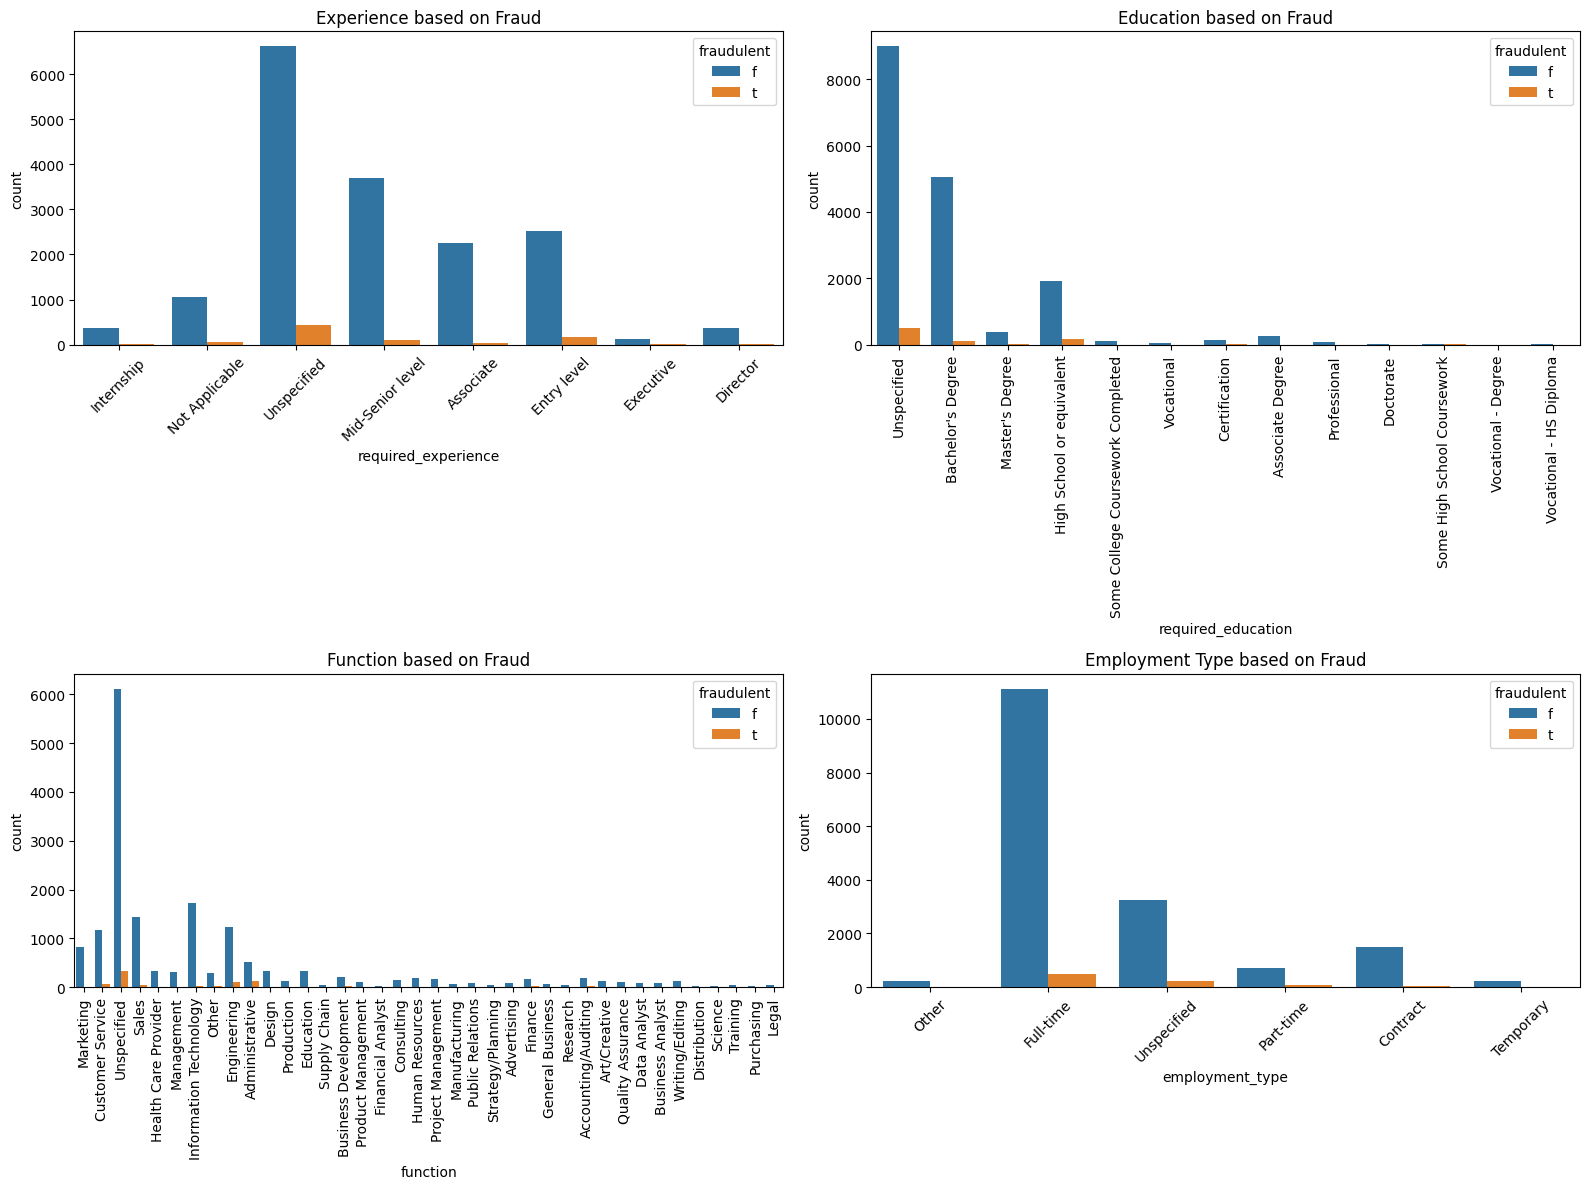

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df, x='required_experience', hue='fraudulent', ax=axes[0, 0])
axes[0, 0].set_title("Experience based on Fraud")
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='required_education', hue='fraudulent', ax=axes[0, 1])
axes[0, 1].set_title("Education based on Fraud")
axes[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x='function', hue='fraudulent', ax=axes[1, 0])
axes[1, 0].set_title("Function based on Fraud")
axes[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x='employment_type', hue='fraudulent', ax=axes[1, 1])
axes[1, 1].set_title("Employment Type based on Fraud")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

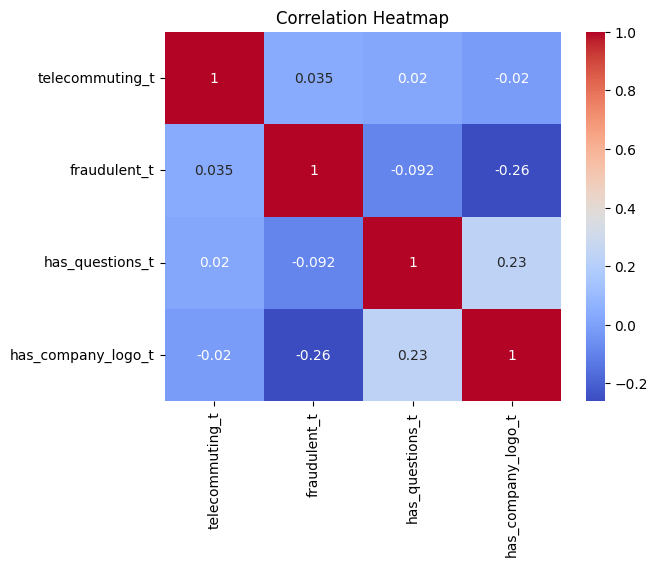

In [11]:
dummy_df = df[['telecommuting', 'fraudulent', 'has_questions', 'has_company_logo']]
dummy_df = pd.get_dummies(dummy_df, drop_first=True, dtype=int)
dummy_df

cm = dummy_df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [51]:
dummy_df

,telecommuting_t,fraudulent_t,has_questions_t,has_company_logo_t
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,1
...,...,...,...,...
17875,0,0,1,1
17876,0,0,1,1
17877,0,0,0,0
17878,0,0,1,0


In [12]:
df['required_education'].value_counts()

required_education
Unspecified                          9502
Bachelor's Degree                    5145
High School or equivalent            2080
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

# Classifiers


## Preprocessing

# NLP

## Preprocessing

In [52]:
from bs4 import BeautifulSoup # package that cleans up HTML tags easily


df = df.copy().sample(frac=1, random_state = 1)

def clean_columns(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()


df['company_profile'] = df['company_profile'].apply(clean_columns).str.replace('\n', " ")
df['description'] = df['description'].apply(clean_columns).str.replace('\n', " ")
df['requirements'] = df['requirements'].apply(clean_columns).str.replace('\n', " ")
df['benefits'] = df['benefits'].apply(clean_columns).str.replace('\n', " ")

/var/folders/26/7l8wl7vd46b9rlntc4gz7qtc0000gn/T/ipykernel_64744/1439875629.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [53]:
df['text'] = df['company_profile'] + " " + df['description'] +  " " + df['requirements'] +  " "  + df['benefits'] # we add all the text categories together to look at words
df['text']

11063    The Technical Team and offering at VML London ...
11986    We Help Create Communities that Withstand the ...
13185    The Boston Consulting Group (#URL_45423e1e1670...
1812      BCCC Enterprises provides management consulti...
9227     Why CSD? CSD is not only a great place to work...
                               ...                        
1162     Being into the IT domain for over 4 years, Wal...
11313    SummaView is een jong bedrijf uit Amersfoort d...
14318    Cloud 66 helps Devs and Ops deploy their appli...
15722     We are a leading medical specialty products s...
14371    Ryanair is Europe’s favourite low fares airlin...
Name: text, Length: 17880, dtype: object

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_full = TfidfVectorizer(stop_words="english", token_pattern = r'(?u)\b[A-Za-z]+\b', min_df=5, ngram_range=(1,2))
X_full = vectorizer_full.fit_transform(df['text'])

In [55]:
total_features = X_full.shape[1]
total_features

158417

In [56]:
features_to_keep = int(total_features * 0.75)
vectorizer_full = TfidfVectorizer(max_features=features_to_keep, stop_words="english", token_pattern = r'(?u)\b[A-Za-z]+\b', min_df=5, ngram_range=(1,2))
X_full = vectorizer_full.fit_transform(df['text'])

In [19]:
X_full.shape[1] # checking new number of features

118812

In [20]:
y = pd.get_dummies(df['fraudulent'], columns=['fraudulent'],dtype=int,  drop_first=True)

In [21]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier,
    "Logistic Regression": LogisticRegression,
    "Random Forest": RandomForestClassifier,
    "SVC": SVC,
    "Multinomial Naive Bayes": MultinomialNB,
}

parameters = [
    {"Decision Tree": {"class_weight": 'balanced'}},
    {"Logistic Regression": {"class_weight": 'balanced'}},
    {"Random Forest": {"class_weight":'balanced'}},
    {"Multinomial Naive Bayes": {}},
    {"SVC": {"class_weight":'balanced'}}
]

In [ ]:
for param_dict in parameters:

    classifier_name = list(param_dict.keys())[0]
    params = param_dict[classifier_name]
    classifier = classifiers[classifier_name]()
    classifier.set_params(**params)


    print(classifier.get_params())

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(classifier, X_full, y, cv=kf)

    print(f"{classifier_name} {params}")
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Print the results
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Decision Tree {'class_weight': 'balanced'}
Accuracy: 0.9601789709172259
Precision: 0.5768463073852296
Recall: 0.6674364896073903
F1-Score: 0.6188436830835118
{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Logistic Regression {'class_weight': 'balanced'}
Accuracy: 0.9828299776286353
Precision: 0.7982924226254002
Recall: 0.8637413394919169
F1-Score: 0.8297282307265669
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Random Forest {'class_weight': 'balanced'}
Accuracy: 0.9807046979865772
Precision: 0.9626998223801065
Recall: 0.625866050808314
F1-Score: 0.7585724282715185
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Multinomial Naive Bayes {}
Accuracy: 0.9625279642058165
Precision: 0.8712121212121212
Recall: 0.26558891454965355
F1-Score: 0.40707964601769914
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC {'class_weight': 'balanced'}
Accuracy: 0.9854586129753915
Precision: 0.9749216300940439
Recall: 0.7182448036951501
F1-Score: 0.8271276595744681


Logistic Regression performed the best and meets our expectations with all metrics rounding up to at least 80%

In [23]:
classifier = LogisticRegression(solver='liblinear', class_weight='balanced')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(classifier, X_full, y, cv=kf)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

/Users/jesusbautista/repos/FraudDetect/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesusbautista/repos/FraudDetect/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesusbautista/repos/FraudDetect/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesusbautista/repos/FraudDetect/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: D

Accuracy: 0.9844519015659955
Precision: 0.8259423503325942
Recall: 0.8602771362586605
F1-Score: 0.8427601809954751


In [28]:
df = df.rename(columns={'required_experience': 'Experience', 'required_education': 'Education', 'employment_type': 'Employment'})
df.to_pickle('df.pkl')
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,Employment Type,Experience,Education,industry,function,fraudulent,in_balanced_dataset,text
5736,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",Unspecified,Unspecified,,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,,f,f,f,Full-time,Entry level,Master's Degree,Financial Services,Finance,f,f,"Duration: Full time / W2Location: Piscataway,..."
7106,English Teacher Abroad,"US, PA, Scranton",Unspecified,Unspecified,We help teachers get safe & secure jobs abroad :),"Play with kids, get paid for it Love travel? ...",University degree required. TEFL / TESOL / CEL...,See job description,f,t,t,Contract,Unspecified,Bachelor's Degree,Education Management,Unspecified,f,f,We help teachers get safe & secure jobs abroad...
11978,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",Unspecified,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,f,f,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f,We are an innovative personnel-sourcing firm w...
9374,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,Unspecified,MarketInvoice is one of the most high-profile ...,Description Our mission at MarketInvoice is to...,Duties and Responsibilities Reviewing contrac...,Competitive salary Private Healthcare Half pr...,f,t,f,Full-time,Associate,Professional,Financial Services,Legal,f,f,MarketInvoice is one of the most high-profile ...
1300,Part-Time Finance Assistant,"GB, LND,",Unspecified,Unspecified,,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,f,f,f,Part-time,Unspecified,Unspecified,Accounting,Unspecified,f,f,Salary:£9 - £10 per hour We are currently goi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,Customer Service Associate,"GB, LND, London",Unspecified,Unspecified,We take the hassle out of finding and booking ...,About Us We take the hassle out of finding and...,About You You must have previous customer ser...,Benefits Salary is £16-20k depending on exper...,f,t,f,Full-time,Unspecified,Unspecified,Consumer Goods,Customer Service,f,f,We take the hassle out of finding and booking ...
17289,QA Engineer,"IL, ,",Unspecified,Unspecified,Xplenty is all about making complex stuff look...,"As a QA engineer, you will be responsible for ...",\r You have to love QA and feel a compulsion ...,About Xplenty: Xplenty is all about making com...,f,f,t,Full-time,Unspecified,Unspecified,Unspecified,Unspecified,f,t,Xplenty is all about making complex stuff look...
5192,HGV Class 1 - Trunk Driver,"GB, ,",Unspecified,Unspecified,With our head office in Radstock the Unique Gr...,We urgently require both Day and Night Trunker...,HGV/LGV Class 1 license. Digi Tacho.,Regular ongoing work. Various start times. Goo...,f,t,t,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,f,f,With our head office in Radstock the Unique Gr...
12172,Firmware Engineer - C# Visual Basic ASM SQL - FL,"US, FL, Daytona",Unspecified,Unspecified,We Provide Full Time Permanent Positions for m...,Experienced Firmware Engineer is required havi...,Experience in programming microcontrollers Em...,,f,f,f,Full-time,Unspecified,Unspecified,Unspecified,Unspecified,f,f,We Provide Full Time Permanent Positions for m...


In [37]:
from joblib import dump

# Save the model
classifier.fit(X_full, y)
dump(classifier, 'log_model_fit.joblib')

print(classifier.coef_)

/Users/jesusbautista/repos/FraudDetect/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-0.13469397 -0.02292129  0.0704632  ... -0.09760149 -0.10829388
  -0.10829388]]


In [31]:
text_df = pd.DataFrame({'text':['hello I am luke!']})

text_df

,text
0,hello I am luke!


In [57]:
dump(vectorizer_full, 'vectorizer_fit.joblib')

['vectorizer_fit.joblib']

In [50]:
text_df = pd.DataFrame({'text':["Dog cat what"]})
var1 = vectorizer_full.transform(text_df['text'])
y_1 =classifier.predict(var1)
y_1


array([0])